<div style="background-color: #00008B; padding: 20px;">
    <h1 style="font-size: 100px; color: #ffffff;">Convolutional Neural Network Layers</h1>
</div>

# Overview of Convolutional Neural Network Layers in PyTorch

In this notebook, we will explore the fundamental layers of Convolutional Neural Networks (CNNs) in PyTorch. The main focus will be on the Convolutional layer and MaxPooling layer, discussing their features, implementations, and applications.

## Topics Covered:
1. **Convolutional Layer:**
   - Introduction to Convolutional Operations
   - Implementation in PyTorch
   - Features and Parameters
   
2. **MaxPooling Layer:**
   - Overview of MaxPooling Operations
   - MaxPooling in PyTorch
   - Advantages and Applications

## Summary Image
![CNN Layers](https://miro.medium.com/v2/resize:fit:624/0*L3yeLjpuuw9MsYXX.png)

This image summarizes the topics we will cover in this notebook, providing a visual representation of the CNN layers.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets , transforms

In [3]:
train_data = pd.read_csv(r'C:\D\Python\Python-Projects\PYTORCH_NOTEBOOKS\PYTORCH_NOTEBOOKS\mnist_train_csv\mnist_train.csv')
test_data =  pd.read_csv(r'C:\D\Python\Python-Projects\PYTORCH_NOTEBOOKS\PYTORCH_NOTEBOOKS\mnist_test_csv\mnist_test.csv')

<div style="border: 2px solid purple; padding: 15px;">
    <h2 style="color: purple;">Purpose of Convolutional Layer in CNN</h2>
    <p style="font-size: 16px;">
        A Convolutional Layer in a Convolutional Neural Network (CNN) is designed to automatically and adaptively learn spatial hierarchies of features from input images. Unlike traditional fully connected layers, a convolutional layer preserves the spatial relationship between pixels by learning image features using small squares of input data. 
    </p>
    <p style="font-size: 16px;">
        The main purpose of a convolutional layer is to detect local patterns in the input image. This is achieved by applying a set of filters (also known as kernels) across the image, which enables the network to learn various features such as edges, textures, and more complex shapes as we go deeper into the network. 
    </p>
    <p style="font-size: 16px;">
        These filters slide over the input image, performing a dot product between the entries of the filter and the input at any position. This operation, known as convolution, produces feature maps that indicate the presence of learned features in the input image.
    </p>
    <p style="font-size: 16px;">
        As the network trains, these filters are optimized to detect specific patterns within the data, making the convolutional layer a powerful tool for extracting meaningful information from images. This is crucial for tasks such as image classification, object detection, and image segmentation.
    </p>
</div>

<div style="border: 2px solid black; padding: 15px;">
    <h2 style="color: purple;">Convolutional Layer in CNN (Using Matrix Form)</h2>
    <p style="font-size: 16px;">
        In a Convolutional Neural Network (CNN), the convolutional layer is responsible for detecting local patterns in the input image by performing a series of mathematical operations. These operations involve matrices that represent both the input image and the filters applied to it.
    </p>
    <p style="font-size: 16px;">
        Consider the input image as a matrix where each element represents a pixel value. The convolutional layer applies a smaller matrix, called a filter or kernel, to this input matrix. This filter matrix slides across the input image matrix, and at each position, a dot product is computed between the filter matrix and the corresponding sub-matrix of the input image.
    </p>
    <p style="font-size: 16px;">
        Here is a concrete example:
    </p>
    <p style="font-size: 16px;">
        Suppose we have the following 4x4 input image matrix:
    </p>
    <pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
        Input Image:
        [ 1, 2, 3, 0 ]
        [ 0, 1, 2, 3 ]
        [ 3, 0, 1, 2 ]
        [ 2, 3, 0, 1 ]
    </pre>
    <p style="font-size: 16px;">
        And the following 3x3 filter matrix:
    </p>
    <pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
        Filter:
        [ 1, 0, 1 ]
        [ 0, 1, 0 ]
        [ 1, 0, 1 ]
    </pre>
    <p style="font-size: 16px;">
        The convolution operation involves sliding the filter over the input image and computing the dot product at each position. For example, the dot product at the top-left corner would be:
    </p>
    <pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
        (1*1 + 2*0 + 3*1) + (0*0 + 1*1 + 2*0) + (3*1 + 0*0 + 1*1) = 1 + 0 + 3 + 0 + 1 + 3 + 0 + 1 = 9
    </pre>
    <p style="font-size: 16px;">
        By performing similar calculations at all positions, we get the following output feature map:
    </p>
    <pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
        Output Feature Map:
        [ 9, 8 ]
        [ 6, 7 ]
    </pre>
    <p style="font-size: 16px;">
        Through this matrix-based approach, convolutional layers efficiently capture spatial hierarchies and local dependencies within the input data, which are essential for understanding and interpreting images in tasks like classification, detection, and segmentation.
    </p>
</div>

In [77]:
conv1 = nn.Conv2d(in_channels= 1 , out_channels= 9 , kernel_size= 3 , stride= 1)
input_image = torch.tensor( train_data.iloc[0][1:].values.reshape(28 , 28) , dtype = torch.float ).unsqueeze(0).unsqueeze(0)
output_images = conv1( input_image  ) 

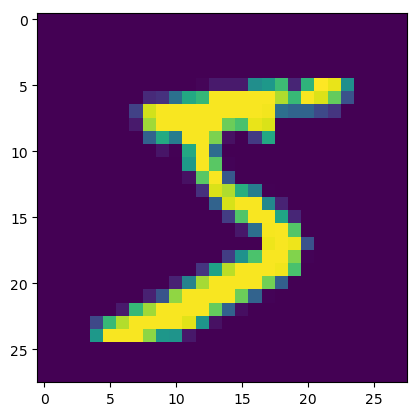

In [78]:
plt.imshow( input_image[0][0].detach().cpu().numpy() )
plt.show()

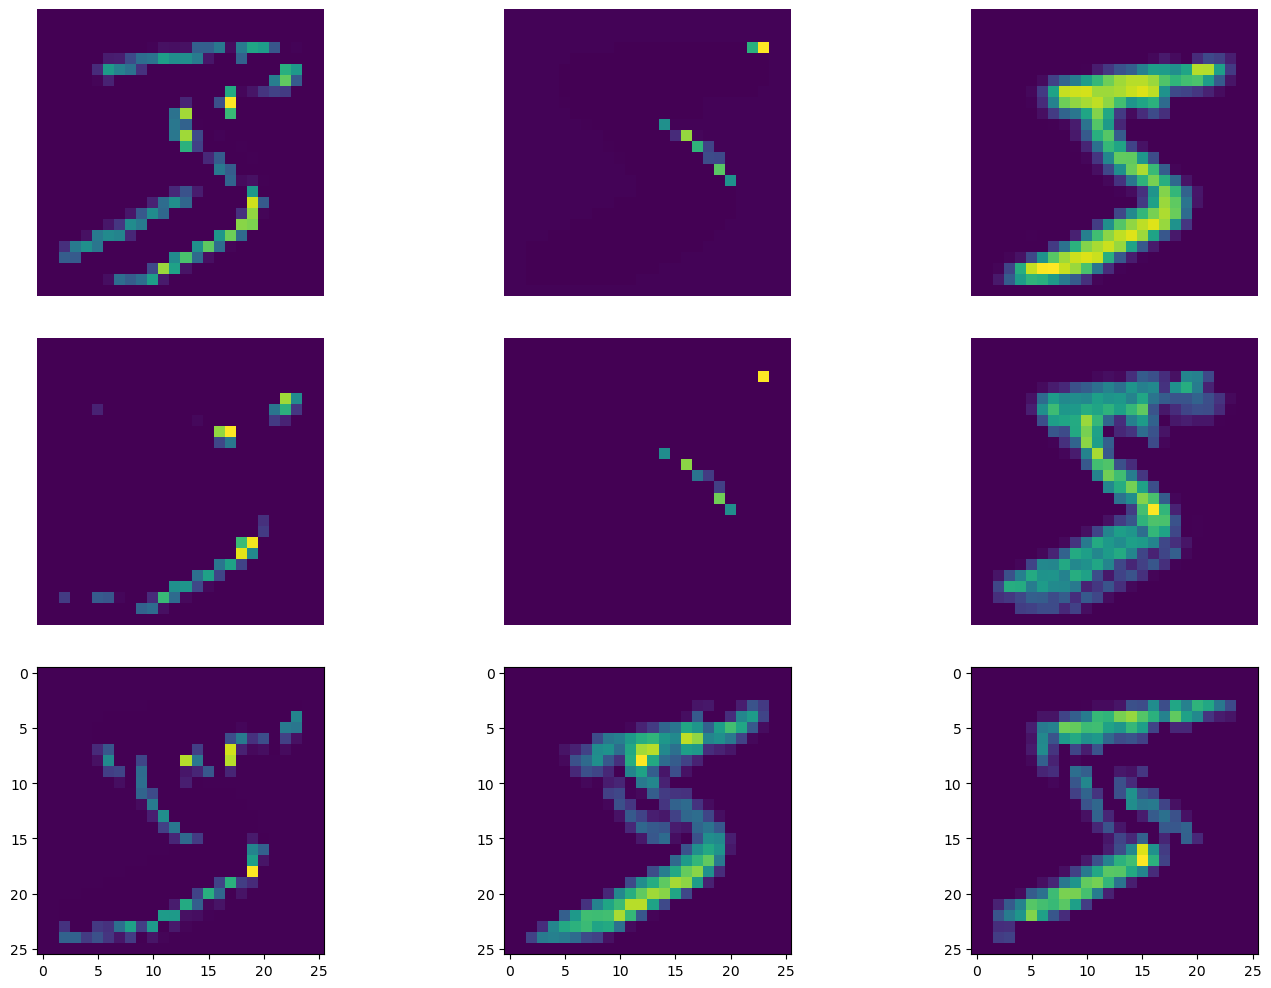

In [87]:
# Example data: create 6 random images
images = [ F.relu( output_images[0][i] ) for i in range(9)]

# Create a 2x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the images and the corresponding axes
for i , (ax, img) in enumerate(  zip(axes, images) ):
    ax.imshow(img.detach().cpu().numpy() , cmap='viridis')  # Display the image in the current subplot
    if i < 6:
        ax.axis('off')  # Hide the axis for the first and second rows

# Adjust the spacing between the plots
plt.tight_layout()
plt.show()


<div style="border: 2px solid red; padding: 15px;">
    <h2 style="color: red;">Understanding the Need for Two `unsqueeze` Calls in a Convolutional Layer</h2>
    <p style="font-size: 16px;">
        When working with convolutional layers in PyTorch, the input data needs to be in a specific shape. This shape is typically represented as \((N, C, H, W)\), where:
    </p>
    <ul style="font-size: 16px;">
        <li><b>N</b>: Batch size (number of images)</li>
        <li><b>C</b>: Number of channels (e.g., 1 for grayscale images, 3 for RGB images)</li>
        <li><b>H</b>: Height of the image</li>
        <li><b>W</b>: Width of the image</li>
    </ul>
    <p style="font-size: 16px;">
        If you start with a 2D image tensor of shape \((H, W)\), you need to add two additional dimensions to convert it to the required shape. This is where the `unsqueeze` method comes into play.
    </p>
    <h3 style="color: red;">Step-by-Step Process</h3>
    <p style="font-size: 16px;">
        Suppose we have a 2D image tensor of shape \((H, W)\). Let's say the shape is \((4, 4)\):
    </p>
    <pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
        Input Image:
        [ [1, 2, 3, 0],
          [0, 1, 2, 3],
          [3, 0, 1, 2],
          [2, 3, 0, 1] ]
    </pre>
    <h3 style="color: red;">First `unsqueeze(0)`</h3>
    <p style="font-size: 16px;">
        The first `unsqueeze(0)` adds the batch dimension. After this operation, the tensor shape becomes \((1, H, W)\):
    </p>
    <pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
        After unsqueeze(0):
        Shape: (1, 4, 4)
        Tensor:
        [ [[1, 2, 3, 0],
           [0, 1, 2, 3],
           [3, 0, 1, 2],
           [2, 3, 0, 1]] ]
    </pre>
    <h3 style="color: red;">Second `unsqueeze(0)`</h3>
    <p style="font-size: 16px;">
        The second `unsqueeze(0)` adds the channel dimension. Now, the tensor shape becomes \((1, 1, H, W)\):
    </p>
    <pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
        After unsqueeze(0) again:
        Shape: (1, 1, 4, 4)
        Tensor:
        [ [[[1, 2, 3, 0],
            [0, 1, 2, 3],
            [3, 0, 1, 2],
            [2, 3, 0, 1]]] ]
    </pre>
    <h3 style="color: red;">Why Is This Necessary?</h3>
    <p style="font-size: 16px;">
        Convolutional layers expect inputs to be in the form of a 4D tensor. If you don't have the correct shape, PyTorch will throw an error. By using `unsqueeze` twice, we ensure that our input image tensor meets the requirements of the convolutional layer:
    </p>
    <ul style="font-size: 16px;">
        <li>The first `unsqueeze` ensures there is a batch dimension, allowing the model to process multiple images simultaneously, even if we have only one image.</li>
        <li>The second `unsqueeze` adds the channel dimension, which is crucial for specifying whether the image is grayscale (1 channel) or RGB (3 channels).</li>
    </ul>
</div>


<div style="border: 2px solid red; padding: 15px;">
    <h2 style="color: red;">Understanding Image Size Reduction in Convolutional Layers</h2>
    <p style="font-size: 16px;">
        When we feed images of size 28x28 into a convolutional layer, they undergo a process called convolution, which results in a reduction of image size. This reduction is primarily due to the operation of the convolutional filters applied to the input images.
    </p>
    <p style="font-size: 16px;">
        The size reduction occurs because convolutional filters slide across the input images, extracting features by performing a dot product between the filter weights and the pixels in each receptive field. As the filter moves, it computes the dot product for each position, resulting in an output feature map.
    </p>
    <p style="font-size: 16px;">
        The reduction in size occurs due to the padding and the size of the filter. When applying a convolutional filter to an image, we typically use a square filter with dimensions smaller than the input image. For example, a common filter size is 3x3. As the filter moves across the image, it cannot extend beyond the image boundaries, resulting in the loss of edge pixels.
    </p>
    <p style="font-size: 16px;">
        Additionally, if no padding is applied to the image, the filter cannot reach the edge pixels, further reducing the output size. With a 3x3 filter and no padding, the filter effectively "loses" one pixel from each edge, resulting in a reduction of 2 pixels in each dimension.
    </p>
    <p style="font-size: 16px;">
        Hence, when we feed images of size 28x28 into a convolutional layer with 3x3 filters and no padding, we end up with output feature maps of size 26x26. This reduction in size is a fundamental aspect of convolutional neural networks and enables them to learn hierarchical representations of images.
    </p>
</div>


<div style="border: 2px solid purple; padding: 15px;">
    <h2 style="color: purple;">Understanding the Purpose of Pooling Layers in Convolutional Neural Networks</h2>
    <p style="font-size: 16px;">
        The main purpose of pooling layers in convolutional neural networks (CNNs) is to progressively reduce the spatial dimensions (width and height) of the input volume. This reduction helps in controlling overfitting by reducing the number of parameters and computational complexity in the network while preserving the most important features.
    </p>
    <p style="font-size: 16px;">
        Pooling layers achieve this by downsampling the feature maps obtained from convolutional layers. They divide the feature maps into smaller regions and apply a pooling operation (such as max pooling or average pooling) to each region. This operation aggregates information within each region, effectively summarizing the presence of features.
    </p>
    <p style="font-size: 16px;">
        By reducing the spatial dimensions, pooling layers help in creating translation-invariant representations of the input data. This means that even if an object moves slightly within an image, the network can still recognize it. Pooling also enhances the network's ability to detect features at different spatial locations and scales, making the learned representations more robust and informative.
    </p>
    <p style="font-size: 16px;">
        Overall, pooling layers play a crucial role in CNNs by:
    </p>
    <ul style="font-size: 16px;">
        <li><b style="color: purple;">Reducing Dimensionality:</b> Decreasing the spatial dimensions of the feature maps, leading to a decrease in computational complexity.</li>
        <li><b style="color: purple;">Preventing Overfitting:</b> Controlling overfitting by reducing the number of parameters and preventing the model from memorizing noise or irrelevant details.</li>
        <li><b style="color: purple;">Creating Invariant Representations:</b> Creating translation-invariant representations, enabling the network to recognize objects regardless of their position within an image.</li>
        <li><b style="color: purple;">Enhancing Feature Detection:</b> Enhancing the network's ability to detect features at different spatial locations and scales.</li>
    </ul>
</div>


<div style="border: 2px solid black; padding: 15px;">
    <h2 style="color: purple;">Understanding Pooling Layers in Convolutional Neural Networks</h2>
    <p style="font-size: 16px;">
        Pooling layers in Convolutional Neural Networks (CNNs) play a crucial role in reducing the spatial dimensions of feature maps while retaining important features. They achieve this by applying a pooling operation over local regions of the input feature maps.
    </p>
    <h3 style="color: purple;">Mathematical Representation:</h3>
    <p style="font-size: 16px;">
        Let's consider a 2D input feature map \( X \) with dimensions \( H \times W \), where \( H \) represents the height and \( W \) represents the width. The pooling operation divides the input feature map into non-overlapping regions and applies a pooling function to each region.
    </p>
    <p style="font-size: 16px;">
        One of the famous pooling layers is the MaxPooling layer, which applies the max pooling function to each region. In MaxPooling, the output value of each region is the maximum value within that region.
    </p>
    <p style="font-size: 16px;">
        Let's denote the output feature map after MaxPooling as \( Y \), which has dimensions \( H' \times W' \), where \( H' \) and \( W' \) are determined based on the size of the pooling window and the stride.
    </p>
    <p style="font-size: 16px;">
        Mathematically, the MaxPooling operation can be represented as:
    </p>
    \[
    Y_{i,j} = \max_{m,n \in R_{i,j}} X_{m,n}
    \]
    <p style="font-size: 16px;">
        where \( R_{i,j} \) represents the region corresponding to the output element \( Y_{i,j} \) in the output feature map.
    </p>
    <p style="font-size: 16px;">
        Another popular pooling layer is AveragePooling, which computes the average value within each region. This operation is represented mathematically as:
    </p>
    \[
    Y_{i,j} = \frac{1}{|R_{i,j}|} \sum_{m,n \in R_{i,j}} X_{m,n}
    \]
    <p style="font-size: 16px;">
        where \( |R_{i,j}| \) denotes the number of elements in the region \( R_{i,j} \).
    </p>
    <h3 style="color: purple;">Summary Image: MaxPooling and AveragePooling Layers</h3>
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*oP-lySI7atBfDgpWQjnB6w.png" alt="MaxPooling and AveragePooling Layers" style="width: 600px;">
    <p style="font-size: 16px;">
        This image provides a visual representation of both MaxPooling and AveragePooling layers, showcasing their role in reducing spatial dimensions and retaining important features in CNNs.
    </p>
</div>


<div style="border: 2px solid green; background-color: lightgreen; padding: 15px;">
    <p style="font-size: 16px; color: darkgreen;">
        Applying a max pooling layer with a kernel size of 3 reduces the size of the image by one-third.
    </p>
</div>


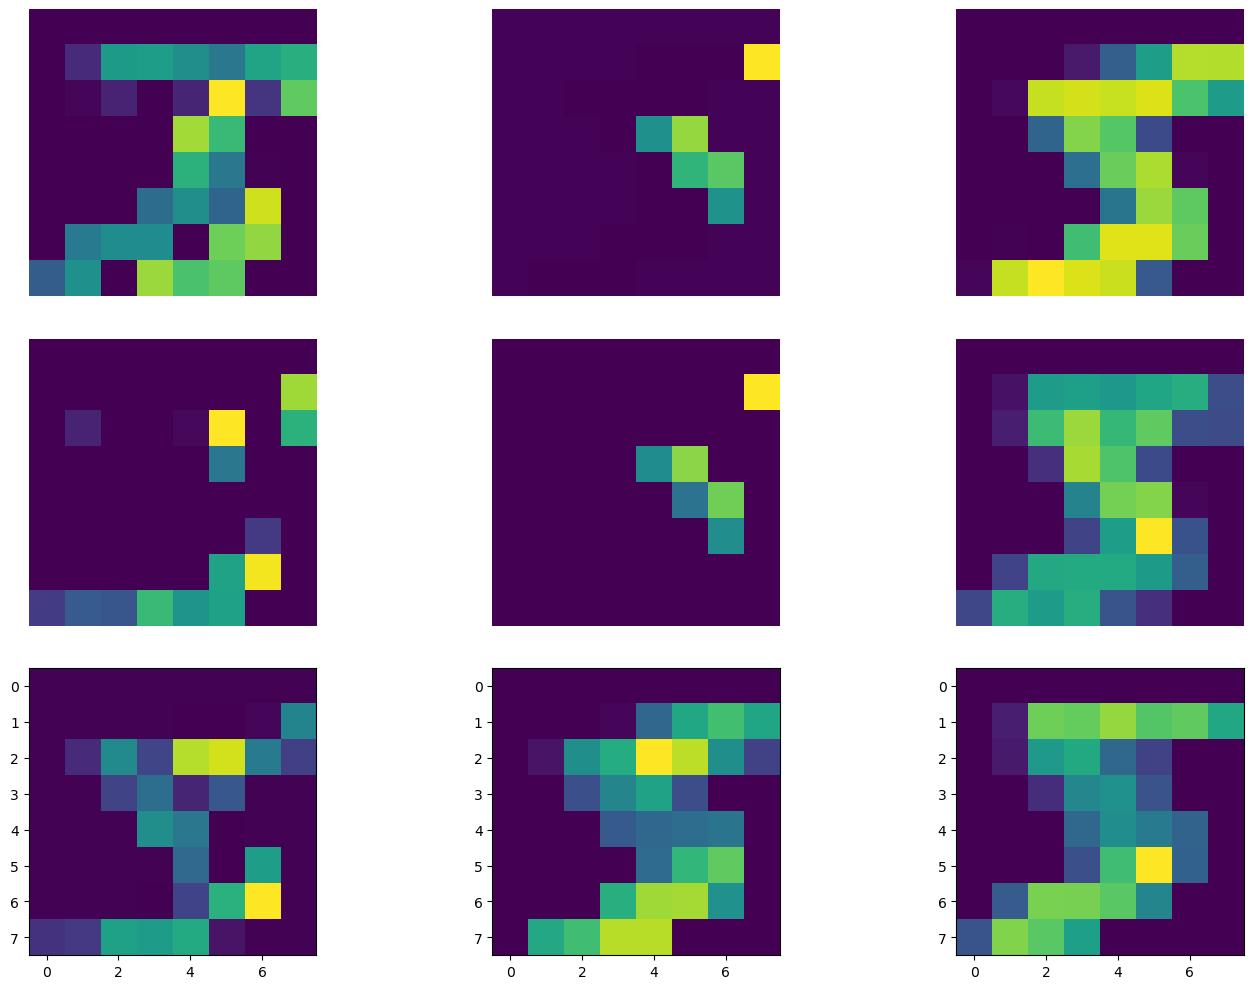

In [109]:
# Example data: create 6 random images
images = [F.relu( output_images[0][i])  for i in range(9)]

images = [ F.max_pool2d( image.unsqueeze(0).unsqueeze(0) ,3,3) for image in images ]
images = [image.squeeze() for image in images ]

# Create a 2x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the images and the corresponding axes
for i , (ax, img) in enumerate(  zip(axes, images) ):
    ax.imshow(img.detach().cpu().numpy() , cmap='viridis')  # Display the image in the current subplot
    if i < 6:
        ax.axis('off')  # Hide the axis for the first and second rows

# Adjust the spacing between the plots
plt.tight_layout()
plt.show()